# Exercise 2: Isomap
### Due June 25 at 14:00

Please note: 

- Read the instructions in the exercise PDF and in this notebook carefully.
- Add your solutions *only* at `YOUR CODE HERE`/`YOUR ANSWER HERE` and remove the corresponding `raise NotImplementedError()`.
- Do not chance the provided code and text, if not stated.
- Do not *add* or *delete* cells.
- Do not `import` additional functionality. 
- Before submitting: Please make sure, that your notebook can be executed from top to bottom `Menu -> Kernel -> Restart & Run all`. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy import linalg 

from sklearn.metrics.pairwise import euclidean_distances
import networkx as nx

np.random.seed(42)

### a) Implement Isomap

You have already implemented MDS for last week's assignment. You can use either version for Isomap: yours or the one below.

**Notice** that the `D` inputs in `MSD` and `Isomap` represent two different distance matrices...

In [2]:
'''
def MDS(D, d):
    n, _ = D.shape
    S = np.zeros_like(D)
    
    D_square = D**2
    D_1 = np.tile(D_square[0], (n,1))
    D_2 = D_1.T
    
    S = 0.5 * (D_1 + D_2 - D_square)
            
    eigenvalues, eigenvectors = linalg.eig(S)
    idx_eigenvalues = np.argsort(-eigenvalues)
    
    largest_d_eigenvalues = eigenvalues[idx_eigenvalues[:d]]
    
    V_d = eigenvectors[:,idx_eigenvalues[:d]]
    Lambda_d = np.diag(largest_d_eigenvalues)
    
    X_embedded = V_d @ np.sqrt(Lambda_d)
    
    return X_embedded
'''

def MDS(D, d):
    """
    Classic Multidimensional Scaling 
    
    Parameters
    ---------
    D: numpy array, shape (n, n) 
       Pairwise distances of n objects.
    d: int
       Embedding dimensionality
    
    Returns
    -------
    X_embedded: numpy array, shape (n, d)
        Coordinates of the embedded objects.
    """
    S = np.zeros(D.shape)
    for i , elem_i in enumerate(S):
        for j, elem_j in enumerate(S):
            S[i][j] = 0.5 * (D[0][i]**2 + D[0][j]**2 - D[i][j]**2)
    w,v = np.linalg.eig(S)
    
    w = np.real(w) #eig returns complex values with i*0
    v = np.real(v)
    
    lambdad = np.diag(w[:d])
    lambdad = np.round(lambdad, 9)
    X_embedded = v[:, :d] @  (np.sqrt(lambdad))
    return X_embedded

Hint: test your function on some synthetic input to check if it works, e.g.

`D = euclidean_distances(np.random.normal(size=(10, 3)))`

In [3]:
def Isomap(D, k, d):
    #Step 0 Given X_1,..., X_n and distance function d(x_i, x_j)
    #Get indexes of the sorted distance matrix
    Dsi = np.argsort(D, axis=-1)
    DKNN = Dsi[:, 1:k+1]
    
    #Step 1 build KNN graph width edges weighted by distances (local distances)
    G = nx.Graph()
    for idx, row in enumerate(DKNN):
        for idx2 in row:
            G.add_edge(idx, idx2, weight=D[idx, idx2])
            
    #Step 2 in KNN graph, compute the shortest path distance dsp between all pair of points and put them in the 
    #matrix D (this corresponds to the geodesic distances)
    dic_dis = nx.floyd_warshall(G)
    
    Dsp = np.zeros(D.shape)

    for key, big_dic in dic_dis.items():
        for key2, small_dic in big_dic.items():
            Dsp[key][key2] = small_dic

    #Step 3 Apply metrix MDS with D ans input. Find embedding that preserves the geodesic distances
    
    return MDS(Dsp, d)

D = euclidean_distances(np.random.normal(size=(5, 3)))
k = 3
d = 2
I = Isomap(D, k, d)
print("I:, ", I)

I:,  [[ 0.          0.        ]
 [-0.86388351  0.99204468]
 [-0.28089644  1.78830216]
 [-1.13546169  0.29871548]
 [-2.92265985 -0.58115512]]


### b) Isomap and USPS 

In [4]:
train_df = pd.read_csv('USPS.csv', sep='\t',)
X = train_df.drop(['Label'], axis=1).values
y = train_df['Label'].values
idx = np.any([y == 0, y == 3, y == 6, y == 9], axis=0)
X = X[idx]
y = y[idx]

print(f'There are {X.shape[0]} data points, each of dimension {X[0].shape}')

There are 400 data points, each of dimension (256,)


Embed the data points with `d=2` and `k=5, 10, 50`. Plot the results.

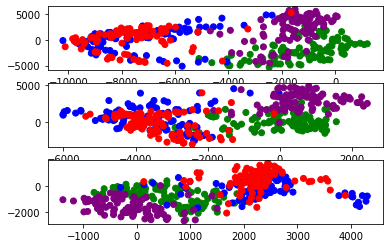

Wall time: 1min 19s


In [5]:
%%time
import matplotlib

k = [5, 10 ,50]
fig, ax = plt.subplots(len(k))



for idx, ks in enumerate(k): 
    D = euclidean_distances(X)
    d = 2
    k = ks
    I = Isomap(D, k, d)

    colors = ['red','black','black','green','black','black','blue','black','black','purple']


    ax[idx].scatter(I[:, 0], I[:, 1], c=y, cmap=matplotlib.colors.ListedColormap(colors))

plt.show()

What happens with `d=1`? 

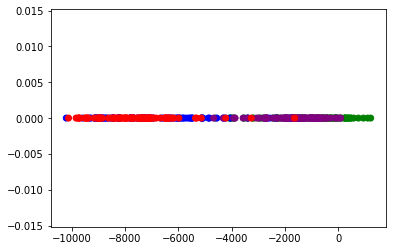

Wall time: 24.6 s


In [6]:
%%time

D = euclidean_distances(X)
d = 1
k = 5
I = Isomap(D, k, d)

colors = ['red','black','black','green','black','black','blue','black','black','purple']

plt.scatter(I[:, 0], np.zeros(I[:, 0].shape), c=y, cmap=matplotlib.colors.ListedColormap(colors))
plt.show()